test 1 : fonction read_full_spectra_centroid avant modification des bins.
    read_chromato_and_chromato_cube : lance la fonction read_chroma + read_full_spctra_centroid
    => chromato_cube
    utilisation de chromato_cube avec peak detection mode 3D et methode "peak_local_max"

- read_chroma(filename, mod_time, max_value) return tic_chromato, (start_time, end_time),(l0, l2, mv, iv, range_min range_max)
- read_full_spectra_centoid(spectra_obj de read_chroma) return full spectra
- full_spectra_to_chromato_cube(spectra_obj et full spectra) return chromato_cube
- preprocess : correction baseline(tic_chromato et chromato_cube)

- read_chromato_and_chromato_cube(filename,mod_time)(read_chroma()(read_full_spectra_centoid(spectra_obj de read_chroma))) return : tic_chromato, time_rn, chromato_cube, sigma, (range_min, range_max)

In [ ]:
import read_chroma
from peak_detection import peak_detection
import numpy as np
import projection
import plot
import baseline_correction
import netCDF4 as nc
import matplotlib.pyplot as plt
import peak_detection
from kneed import KneeLocator
from read_chroma import read_chromato_and_chromato_cube

In [ ]:
file_path = '/home/camille/Documents/app/data/input/A-F-028-817822-droite-ReCIVA.cdf'

In [94]:
# get_mod_time(file_path):
data = nc.Dataset(file_path, 'r')
scan_number = data.dimensions['scan_number'].size
if scan_number == 328125:   
    mod_time = 1.25
    print("type de donnees: G0/plasma")
elif scan_number == 540035:
    mod_time = 1.7
    print("type de donnnees: air expire")
else:
    print("scan_number non reconnu")
mod_time
# return mod_time

type de donnnees: air expire


1.7

In [ ]:
filtering_factor = 0.4
# estimation with filtering_factor_estimation.ipynb

In [97]:
chromato_tic, time_rn, chromato_cube, sigma, mass_range = read_chromato_and_chromato_cube(file_path, mod_time, pre_process=True)
dynamic_threshold_fact = filtering_factor * sigma * 100 / np.max(chromato_tic)
coordinates = peak_detection.peak_detection((chromato_tic, time_rn, None), None, chromato_cube, dynamic_threshold_fact, None)

chromato read 8.136160373687744 s
--- 108.78397274017334 seconds --- to compute full spectra centroid
full spectra computed 110.35678672790527 s
baseline corrected


In [98]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, mod_time, chromato_tic.shape)

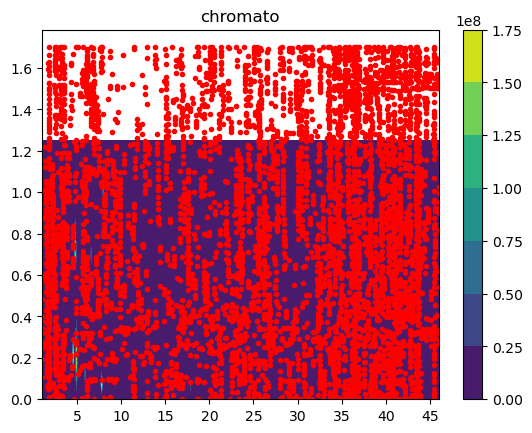

In [99]:
plot.visualizer((chromato_tic, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)

In [1]:
import platform

def get_status():
        """Retourne le statut de la configuration"""
        return platform.system()
print(get_status())

Linux
